# (LOAN)WORDS SHORT OVERVIEW #

This notebook covers the explaratory data analysis, namely, the age and the origin of the words. Even though we **did not aim** at using this information for feature engineering, we found such analysis crucial to have a complete overview of the data and the topic we were working on. 

Thus, we briefly looked at the following:
1. **The age** of the words in the list 
2. **The donor language** paradigm for the loanwords 

 ### 0. LOADING MODULES AND DATA ###

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
import operator
import collections

In [10]:
df = pd.read_csv('ind_lw2.csv', ';')

In [12]:
new_dfseg = []

for i in df.segments:
    new_dfseg.append(eval(i))

df.segments = new_dfseg

In [13]:
classes = []

for s in df.borrowing_score:
    if s == 1.0:
        classes.append(s)
    else:
        classes.append(0.0)

In [14]:
df.borrowing_score = classes

### 1.  AGE OF THE (LOAN) WORDS ###

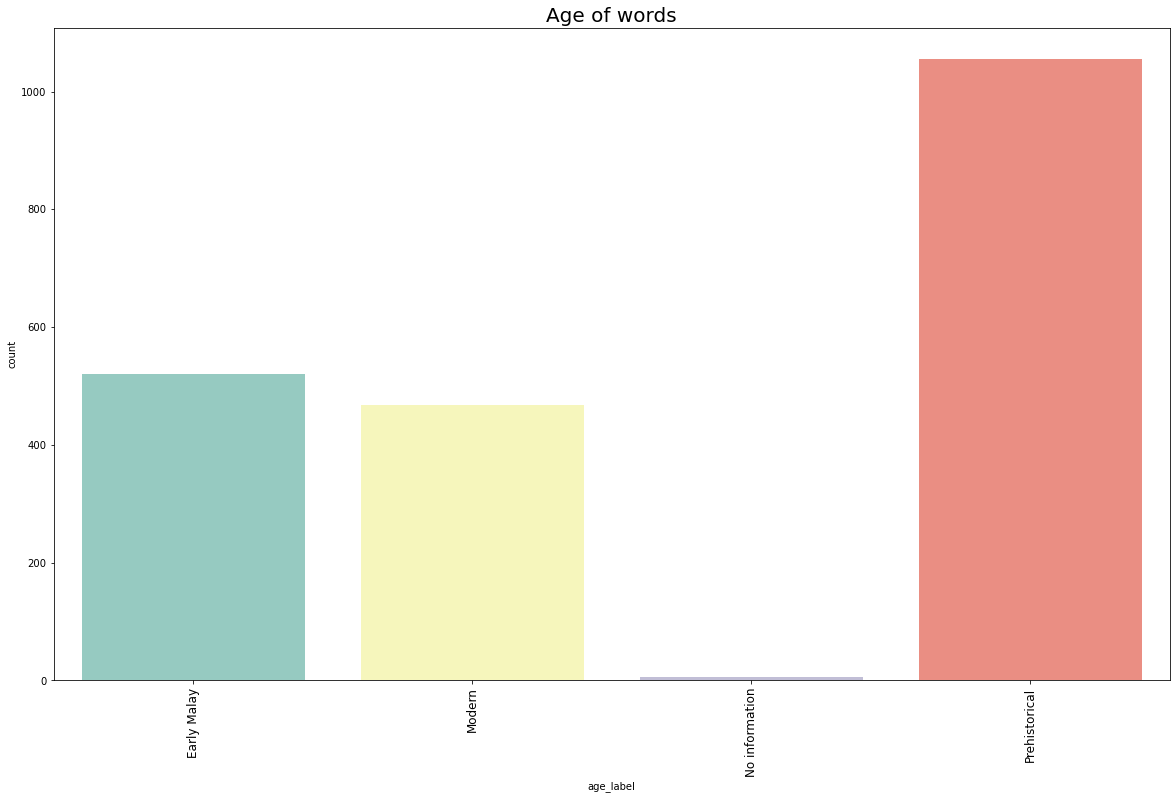

In [19]:
plt.figure(figsize=(20,12))
sns.countplot(df.age_label.sort_values(), palette="Set3")
plt.title("Age of words",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

In [20]:
df_bor = df[df.borrowing_score == 1.0]

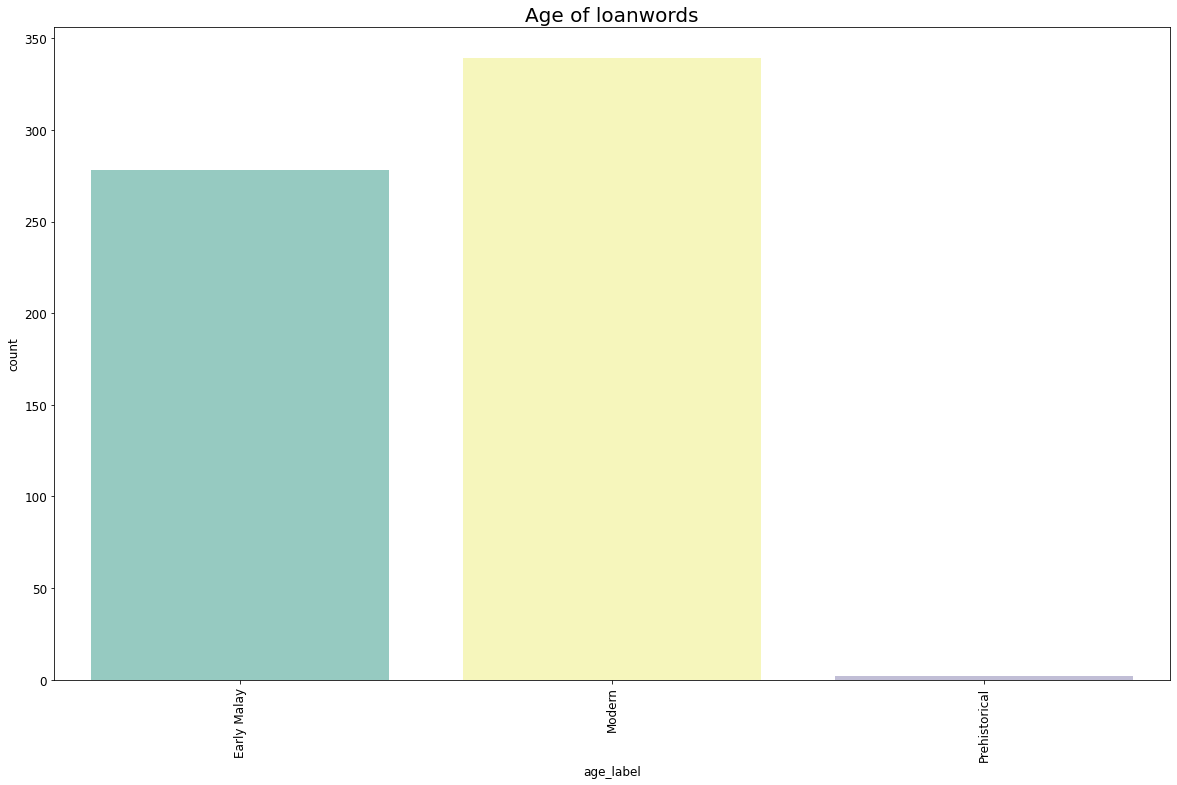

In [87]:
plt.figure(figsize=(20,12))
sns.countplot(df_bor.age_label.sort_values(),  palette="Set3")
plt.title("Age of loanwords",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

In comparison to non-loanwords, the appearnce of which in Indonesian dates back to Prehistorical Age, almost all the loanwords appeared in the language either during Early Malay period or the Modern Age. 

### Reference to the time periods (Haspelmath & Tadmor) ##

### Prehistorical###
Any stage of the language or its ancestors before the emergence of written Malay. This was in 7th century, but the language of these early inscriptions did not arise overnight, so the year 500 was chosen as the end of this stage.

### Early Malay ###
Between years 500 and 1700.

### Modern ###
The period from the 18th century, when written documents from Indonesia begin to exhibit patterns different from the written language of the Malay heartland on the Malay Peninsula.

### 2. DONOR LANGUAGE DISTRIBUTION###

In [23]:
single_donors = []
donors = list(df.donor.unique())

for i in donors:
    if type(i) == str:
        if len(list(nltk.word_tokenize(i))) == 1:
            single_donors.append(i)
        if len(list(nltk.word_tokenize(i))) == 2 and list(nltk.word_tokenize(i))[0] == 'Old':
            single_donors.append(i)

single_donors

['Arabic',
 'Sanskrit',
 'Sundanese',
 'Javanese',
 'Tamil',
 'Balinese',
 'Dutch',
 'Persian',
 'Minangkabau',
 'Old Javanese',
 'English',
 'Hokkien',
 'Khmer',
 'Latin',
 'Portuguese',
 'Hindi-Urdu',
 'Greek',
 'Madurese',
 'Spanish',
 'Indo-Portuguese',
 'French']

In [24]:
only_donors = []

for i in df.donor:
    if type(i) == str:
        only_donors.append(i)

#### 2.1. ALL DONORS###

In [25]:
donors_dict = {}

for i in single_donors:
    donors_dict[i] = only_donors.count(i)
    
donors_dict

{'Arabic': 96,
 'Sanskrit': 139,
 'Sundanese': 8,
 'Javanese': 34,
 'Tamil': 9,
 'Balinese': 4,
 'Dutch': 82,
 'Persian': 15,
 'Minangkabau': 2,
 'Old Javanese': 3,
 'English': 11,
 'Hokkien': 11,
 'Khmer': 1,
 'Latin': 3,
 'Portuguese': 25,
 'Hindi-Urdu': 7,
 'Greek': 1,
 'Madurese': 1,
 'Spanish': 1,
 'Indo-Portuguese': 1,
 'French': 1}

In [84]:
sorted_all = sorted(donors_dict.items(), key=lambda kv: kv[1])
sorted_dict = collections.OrderedDict(sorted_all)

<BarContainer object of 21 artists>

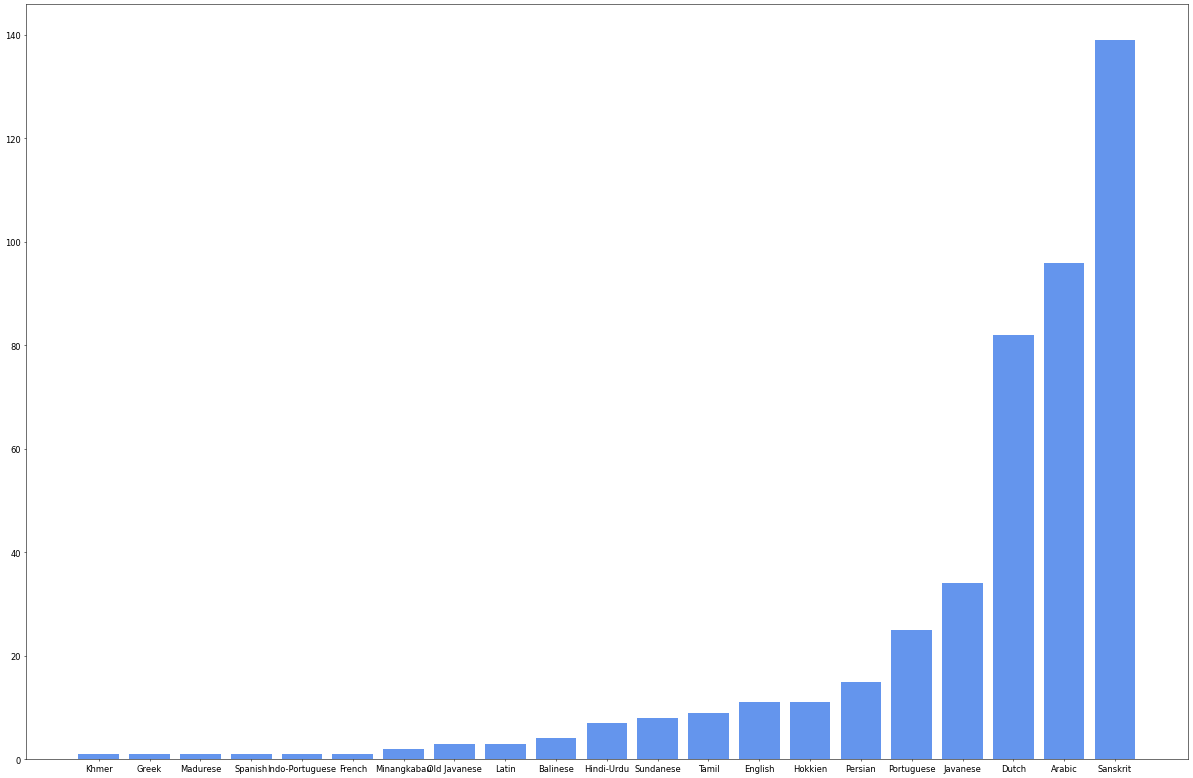

In [85]:
keys = sorted_dict.keys()
values = sorted_dict.values()

w = 30
h = 20
d = 50
plt.figure(figsize=(w, h), dpi=d)
plt.rcParams.update({'font.size': 12})

plt.bar(keys, values, color = 'cornflowerblue')

#### 2.2. MOST COMMON DONORS###

In [74]:
dict_top = {'Arabic': 96, 'Sanskrit': 139, 'Javanese': 34, 'Dutch': 82, 'Portuguese': 25}
sorted_top = sorted(dict_top.items(), key=lambda kv: kv[1])
sorted_dict = collections.OrderedDict(sorted_top)

<BarContainer object of 5 artists>

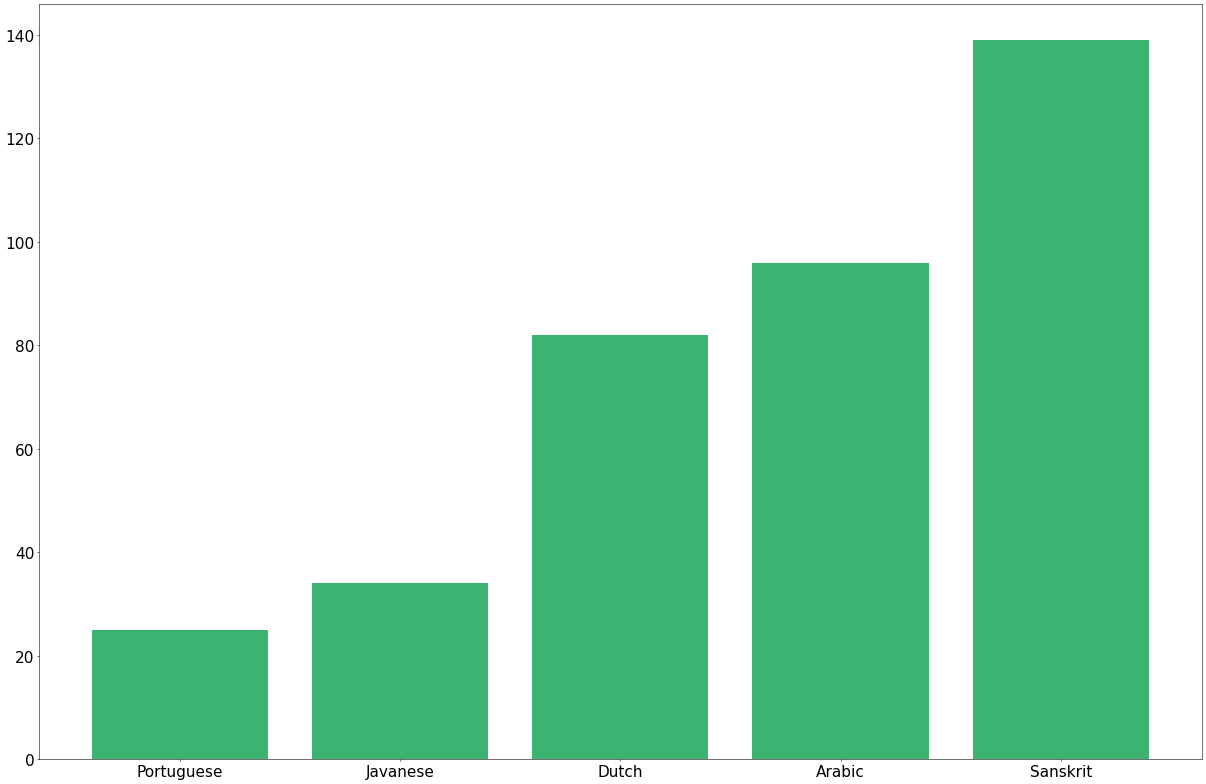

In [76]:
keys = sorted_dict.keys()
values = sorted_dict.values()

w = 30
h = 20
d = 50
plt.figure(figsize=(w, h), dpi=d)
plt.rcParams.update({'font.size': 22})

plt.bar(keys, values, color = 'mediumseagreen')

The results show that Indonesian has a lot of loanwords borrowed from various language clusters: 

**Austronesian languages** (Javanese, Sundanese, Balinese)

**Indian Languages** (Sanskrit, Tamil)

**Middle Eastern Languages** (Arabic, Persian)

**European Languages** (Potruguese, Dutch, English, French)

### DOMINANT DONORS ###

### Sanskrit ##

Sanskrit loanwords form the biggest cluster of loanwords' origins. In terms of meaning, Sanskrit loanwords cover many aspects of religion, art and daily life. These loanwords have entered the basic vocabulary of Indonesian to such an extent that, for many natives, they are no longer perceived as foreign.

### Arabic ##

The Arabic loanwords are particularly concerned with religion of Islam.

### Dutch ##

The loanwords from Dutch came to the language due to colonial reasons. In terms of meaning, the Dutch words cover all aspects of life. Some Dutch loanwords have clusters of multiple consonants, posing difficulties for speakers of Indonesian and representing a particular interest for our project. 

### Javanese ##

A large amount of Javanese loanwords is explained by Java's position as the center of Indonesian politics, education, and culture. Like Sanskrit loanwords, many Javanese ones are not percieved as loanwords and have fully integrated into the language. 

### Portuguese ##

Portuguese loanwords were taken by Indonesian during Malay period. Those times, Portuguese was the langauge of trade and thus, contributed the names of the items the early European traders brought to Southeast Asia.

## Resources 

Haspelmath, Martin and Tadmor, Uri (eds.) 2009. World Loanword Database. Leipzig: Max Planck Institute for Evolutionary Anthropology. (Available online at http://wold.clld.org, Accessed on 2021-02-26.)

Ricklefs, M.C. (1991). A History of Modern Indonesia Since c.1300, 2nd Edition. London: MacMillan. p. 26.